In [ ]:
# TO-DO

# Check out this video: https://www.youtube.com/watch?v=bDhvCp3_lYw

# CLEANING DUTIES:
# - Column 'Date' : Check with Garima
# - Column 'Year' : Check with Garima
# - Column 'Type'
# - Column 'Country'
# - Column 'State'
# - Column 'Activity'
# - Column 'Injury' -- Injury: fatal 0, non-fatal 1, not specified -1? String would also work if uniformal (ofc) - Nicole (we can probably iterate here over the column, see minute 31:00 in YT video)
# - Column 'Time' : Check with Marco
# - Column 'Species' : Done

# A thought, can we also punt statistics that we learned during W2day3, grouping etc.? - Yey we should try to find correlation etc

#Notes - Nicole
# df.fillna('not specified) - we could fill this across the whole dataframe
# we need a no injury too


In [ ]:
# Data import
import pandas as pd
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
df = pd.read_excel(url, usecols=["Date","Year","Type","Country","State","Activity","Injury","Time", "Species "]).squeeze("columns")

#We could add column_season (please make sure which season since northern / southern hemisphere)

#objective: advisory role for when not to surf in AUSTRALIA

In [ ]:
# Remove rows that only contain NaN values
df2 = df.dropna(how='all').reset_index(drop=True)
df2

,Date,Year,Type,Country,State,Activity,Injury,Time,Species
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Swimming,"Minor injuries to back, abdomen and legs",16h00,Tiger shark
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,Surfing,"No injury, shark bit surfboard",NaN,Tiger shark 8'
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,Swimming,Lacerations to left foot,13h30,3' to 4' shark
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Leg bitten,11h30,Tiger shark
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,Fishing,Calf of lower left leg injured,NaN,"Bull shark, 7'"
...,...,...,...,...,...,...,...,...,...
6939,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,FATAL,NaN,NaN
6940,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,FATAL,NaN,NaN
6941,1900-1905,0.0,Unprovoked,USA,North Carolina,Swimming,FATAL,NaN,NaN
6942,1883-1889,0.0,Unprovoked,PANAMA,NaN,NaN,FATAL,NaN,NaN


In [ ]:
# Formatting to lowercase
df_lower = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_lower

,Date,Year,Type,Country,State,Activity,Injury,Time,Species
0,15 mar 2024,2024.0,unprovoked,australia,queensland,swimming,"minor injuries to back, abdomen and legs",16h00,tiger shark
1,04 mar 2024,2024.0,unprovoked,usa,hawaii,surfing,"no injury, shark bit surfboard",NaN,tiger shark 8'
2,02 mar-2024,2024.0,unprovoked,usa,hawaii,swimming,lacerations to left foot,13h30,3' to 4' shark
3,25 feb-2024,2024.0,unprovoked,australia,western australia,NaN,leg bitten,11h30,tiger shark
4,14 feb-2024,2024.0,unprovoked,india,maharashtra,fishing,calf of lower left leg injured,NaN,"bull shark, 7'"
...,...,...,...,...,...,...,...,...,...
6939,before 1903,0.0,unprovoked,australia,western australia,diving,fatal,NaN,NaN
6940,before 1903,0.0,unprovoked,australia,western australia,pearl diving,fatal,NaN,NaN
6941,1900-1905,0.0,unprovoked,usa,north carolina,swimming,fatal,NaN,NaN
6942,1883-1889,0.0,unprovoked,panama,NaN,NaN,fatal,NaN,NaN


In [ ]:
# Filtering on activity Surfing
# df_activity = df_lower[(df['Activity'] == "surfing") | (df['Activity'] == "NaN")]
df_activity = df_lower[(df_lower['Activity'] == "surfing")]
df_activity

,Date,Year,Type,Country,State,Activity,Injury,Time,Species
1,04 mar 2024,2024.0,unprovoked,usa,hawaii,surfing,"no injury, shark bit surfboard",NaN,tiger shark 8'
8,09-jan-2024,2024.0,unprovoked,australia,south australia,surfing,leg bitten,13h00,white shark
10,30 dec-2023,2023.0,unprovoked,usa,hawaii,surfing,fatal,11h12,NaN
12,28 dec-2023,2023.0,unprovoked,australia,south australia,surfing,fatal,13h30,"white shark, 13'"
13,25 dec-2023,2023.0,unprovoked,australia,new south wales,surfing,injury to right thigh,16h30,NaN
...,...,...,...,...,...,...,...,...,...
5866,04-jan-1922,1922.0,unprovoked,australia,new south wales,surfing,"fatal, disappeared, then his shark-bitten rema...",evening,NaN
5911,22-mar-1918,1918.0,unprovoked,australia,new south wales,surfing,"severe laceration to arm, necessitating surgic...",18h00,12' shark
6731,1828,1828.0,unprovoked,usa,hawaii,surfing,fatal,NaN,NaN
6777,1779,1779.0,unprovoked,usa,hawaii,surfing,"fatal, buttock lacerated",NaN,NaN


In [ ]:
# Removing duplicates withing column Activity
df_dup_removed = df_activity.drop_duplicates()
df_dup_removed.reset_index(drop=True)
df_dup_removed

,Date,Year,Type,Country,State,Activity,Injury,Time,Species
1,04 mar 2024,2024.0,unprovoked,usa,hawaii,surfing,"no injury, shark bit surfboard",NaN,tiger shark 8'
8,09-jan-2024,2024.0,unprovoked,australia,south australia,surfing,leg bitten,13h00,white shark
10,30 dec-2023,2023.0,unprovoked,usa,hawaii,surfing,fatal,11h12,NaN
12,28 dec-2023,2023.0,unprovoked,australia,south australia,surfing,fatal,13h30,"white shark, 13'"
13,25 dec-2023,2023.0,unprovoked,australia,new south wales,surfing,injury to right thigh,16h30,NaN
...,...,...,...,...,...,...,...,...,...
5866,04-jan-1922,1922.0,unprovoked,australia,new south wales,surfing,"fatal, disappeared, then his shark-bitten rema...",evening,NaN
5911,22-mar-1918,1918.0,unprovoked,australia,new south wales,surfing,"severe laceration to arm, necessitating surgic...",18h00,12' shark
6731,1828,1828.0,unprovoked,usa,hawaii,surfing,fatal,NaN,NaN
6777,1779,1779.0,unprovoked,usa,hawaii,surfing,"fatal, buttock lacerated",NaN,NaN


In [ ]:
# Rename back to df
df = df_dup_removed

In [ ]:
# Codeblock for cleaning column 'species' - Maurits

df = df.rename(columns={'Species ': 'species'})
df['species'] = df['species'].str.strip() # remove whites
df['species'] = df['species'].str.lower() # lower case (although this was already done)
df['species'] = df['species'].str.replace(r'[^a-z\s]', '', regex=True) # replace anything but characters
# df['species'] = df['species'].apply(lambda x: 'not specified' if len(str(x)) > 40 else x) #replaces strings longer than 40 characters

#still trying to find a formula that searches for "contains" and replaces it with a value

# # Replace any occurrence containing 'bull' with 'bull shark'
df['species'] = df['species'].str.replace(r'bul.*', 'bull shark', regex=True)
df['species'] = df['species'].str.replace(r'black.*', 'blacktip shark', regex=True)
df['species'] = df['species'].str.replace(r'bronze.*', 'bronze whaler', regex=True)
df['species'] = df['species'].str.replace(r'white.*', 'white shark', regex=True)
df['species'] = df['species'].str.replace(r'wfit.*', 'white shark', regex=True)
df['species'] = df['species'].str.replace(r'spin.*', 'spinner shark', regex=True)
df['species'] = df['species'].str.replace(r'tig.*', 'tiger shark', regex=True)
df['species'] = df['species'].str.replace(r'hamm.*', 'hammer shark', regex=True)
df['species'] = df['species'].str.replace(r'wobb.*', 'wobbegong shark', regex=True)
df['species'] = df['species'].str.replace(r'lemon.*', 'lemon shark', regex=True)
df['species'] = df['species'].str.replace(r'reef.*', 'reef shark', regex=True)
df['species'] = df['species'].str.replace(r'nurse.*', 'nurse shark', regex=True)

#replaces strings longer than 15 characters with "other shark"

# df['species'] = df['species'].replace(['unknown', 'n/a', ''], 'not specified')
# df['species'] = df['species'].str.replace(r(len(str(species)) > 15), 'other shark', regex=True)
# df['species'] = str(df['species'])
# df['species'] = df['species'].apply(lambda x: 'other shark' if str(len(x)) > 15 else x)

replacement_value = 'other shark'
df['species'] = df['species'].apply(lambda x: replacement_value if isinstance(x, str) and len(x) > 15 else x)
# df['species'] = df['species'].apply(lambda x: replacement_value if len(x) > 15 else x)

value_counts = df['species'].value_counts()

# Step 2: Identify the values that have a count of less than 2
values_to_replace = value_counts[value_counts < 3].index

# Step 3: Replace these values in the DataFrame
df['species'] = df['species'].replace(values_to_replace, 'other shark')

# # Loop through the DataFrame and replace long values
# for i in range(len(df['species'])):
#     if len(df['species'].at[i, 'text_column']) > 15:
#         df['species'].at[i, 'text_column'] = replacement_value



# df['species'].apply(lambda x: 0 if x == 'C' else (1 if x == 'Q' else 2))
# # for i in ['species']:
# #   if i > str(len(15)):
# #     replace(i,'')

# species_list = ['species']
# for species in species_list:
#   if len(species)>15:
#     species_list[species_list.index(species)] = 'other shark'

# print(species_list)

# replacements = {
#     'white shark': 'great white shark',
#     'bullshark': 'bull shark',
#     'shark': 'not specified',
#     'NaN': '',
#     'blacktip': 'blacktip shark'
#     # Add other replacements as needed
# }
# df['species'] = df['species'].replace(replacements)


df['species'] = df['species'].replace(['unknown', 'n/a', ''], 'not specified')
df = df.reset_index(drop=True)
# unique_values = df['species'].unique()
# unique_sorted = set(unique_values)
# unique_sorted
set(df['species'])

{' m  shark',
 ' m  white shark',
 ' m shark',
 ' m white shark',
 ' shark',
 ' to  m shark',
 ' to  shark',
 ' white shark',
 'a small shark',
 'blacktip shark',
 'bronze whaler',
 'bull shark',
 'invalid',
 'lemon shark',
 nan,
 'not specified',
 'other shark',
 'reef shark',
 'small shark',
 'spinner shark',
 'tiger shark',
 'white shark',
 'wobbegong shark'}

In [ ]:
# Block Nicole's Injury

#Split the columns in two - 'Primary_Injury' and 'Secondary_Detail'
df['Primary_Injury'] = df['Injury'].str.split(',',n=1, expand=True).iloc[:,0]
df['Secondary_Detail'] = df['Injury'].str.split(',',n=1, expand=True ).iloc[:,1]

#Create a condition that checks for 'no injury' and 'fatal'
condition = df['Primary_Injury'].isin(['no injury', 'fatal'])

#Apply the condition and replace other values with 'non fatal'
df['Primary_Injury'] = df['Primary_Injury'].where(condition, 'non fatal')

#We should drop the 'Injury' column
# df_without Injury = df.drop('Injury', axis=1) we will create a new dataframe
# df.drop('Injury', axis=1, inplace=True) this will retain the dataframe
df = df.drop(columns=['Injury'])

In [ ]:
# Block Marco - Time column
df_time = df['Time'].unique()
df_time

array([nan, '13h00', '11h12', '13h30', '16h30', '10h20', '15h05', '16h00',
       '15h45', '07h50', '10h00', '09h30', '08h45', '15h00', '17h20',
       '10h10', '19h15', '07h15', '07h00', '17h30', '17h17', '19h00',
       '15h30', '17h45', 'early  morning', '07h30', '11h43', '15h20',
       '09h00', '13h20', '10h30', '06h40', '12h30', '07h07', '14h00',
       '11h15', '07h45', '14h20', '06h00', 'sunset', '10h45', '08h15',
       '17h00', '11h30', 'morning', '14h00-15h00', '14h15', '14h30',
       '08h00', '10h40', '08h30', '12h20', '10h50', '20h30', '14h33',
       '16h15', '12h45', '12h00', '09h15', '11h55', '19h30', '18h30',
       '16h26', '13h40', '06h15', '06h45', 'early afternoon', '18h00',
       '13h15', '09h29', '10h47', '15h35', '11h00', '16h50', 'afternoon',
       'late afternoon', '18h45', '10h44', '11h45', '17h10', '13h45',
       '9h00', '10h43', 'after noon', '19h05', 1300, '14h34', '18h15',
       '13h50', '19h20', '10h25', '16h20', '16h45', '09h45',
       'sometime b

In [ ]:
# Cleaning the Time column
import numpy as np
df['Time']= df['Time'].replace({
    'early  morning': '07h00',
    'sunset': '19h00',
    'early afternoon' : '16h00',
    'late afternoon' : '18h00',
    'evening' : '20h00',
    'sometime between 06h00 & 08hoo' : '07h00',
    '07h00 - 08h00' : '07h30',
    '0830' : '08h30',
    'just before noon' : '11h30',
    'am' : '09h00',
    'dusk' : '21h00',
    '"just before 11h00"' : '10h30',
    'just before sundown' : '19h30',
    '17h00 or 17h40' : '17h00',
    '--' : '12h00',
    '09h00 -10h00' : '09h30',
    '20h45 (sunset)' : '20h45',
    'p.m.' : '17h00',
    '8:04 pm' : '08h04',
    'after dusk' : '21h30',
    'noon' : '12h00',
    '30 minutes after 1992.07.08.a' : '08h30',
    '17h00 sunset' : '17h00',
    'x' : '12h00',
    '18h30 (sunset)' : '18h30',
    '06j00' : '06h00',
    '16h30 or 18h00' : '17h15',
    'night' : '24h00',
    'morning' : '10h00',
    'early morning' : '09h00',
    'midday' : '12h00',
    'afternoon' : '17h00',
    '10jh45' : '10h45',
    '9h00' : '09h00',
    1300 : '13h00',
    '11h115' : '11h15',
    'after noon' : '12h30',
    '14h00-15h00' : '14h30'
})

# Function to categorized all inputs in the Time column
def categorize_time(df_time):
    if pd.isna(df_time):
        return np.nan
    hour = int(df_time.split("h")[0])

    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

# Apply categorization
df_timeday = df['Time'].apply(categorize_time) # Categorizing all times
#df_timeday = df["Time"].fillna('undefined') # All non values changes to "undefined"
df_timeday

0             NaN
1       afternoon
2         morning
3       afternoon
4       afternoon
          ...    
1115      evening
1116      evening
1117          NaN
1118          NaN
1119          NaN
Name: Time, Length: 1120, dtype: object

In [ ]:
df['timeday'] = df['Time'].apply(categorize_time)
df

,Date,Year,Type,Country,State,Activity,Time,species,Primary_Injury,Secondary_Detail,timeday
0,04 mar 2024,2024.0,unprovoked,usa,hawaii,surfing,NaN,tiger shark,no injury,shark bit surfboard,NaN
1,09-jan-2024,2024.0,unprovoked,australia,south australia,surfing,13h00,white shark,non fatal,None,afternoon
2,30 dec-2023,2023.0,unprovoked,usa,hawaii,surfing,11h12,NaN,fatal,None,morning
3,28 dec-2023,2023.0,unprovoked,australia,south australia,surfing,13h30,white shark,fatal,None,afternoon
4,25 dec-2023,2023.0,unprovoked,australia,new south wales,surfing,16h30,NaN,non fatal,None,afternoon
...,...,...,...,...,...,...,...,...,...,...,...
1115,04-jan-1922,1922.0,unprovoked,australia,new south wales,surfing,20h00,NaN,fatal,"disappeared, then his shark-bitten remains wa...",evening
1116,22-mar-1918,1918.0,unprovoked,australia,new south wales,surfing,18h00,shark,non fatal,necessitating surgical amputation at the elbow,evening
1117,1828,1828.0,unprovoked,usa,hawaii,surfing,NaN,NaN,fatal,None,NaN
1118,1779,1779.0,unprovoked,usa,hawaii,surfing,NaN,NaN,fatal,buttock lacerated,NaN


In [ ]:
pivot_time = pd.pivot_table(df, index='timeday', columns = 'Primary_Injury', aggfunc = 'size')
pivot_time

Primary_Injury,fatal,no injury,non fatal
timeday,,,
afternoon,22.0,57.0,348.0
evening,3.0,12.0,80.0
morning,20.0,63.0,268.0
night,NaN,NaN,2.0


In [ ]:
pivot_prov = pd.pivot_table(df, index='Type', columns = 'Primary_Injury', aggfunc = 'size')
pivot_prov

Primary_Injury,fatal,no injury,non fatal
Type,,,
invalid,NaN,7.0,34.0
provoked,NaN,NaN,13.0
questionable,NaN,2.0,1.0
under investigation,NaN,NaN,1.0
unprovoked,56.0,160.0,843.0
unverified,NaN,NaN,1.0


<Axes: xlabel='timeday', ylabel='count'>

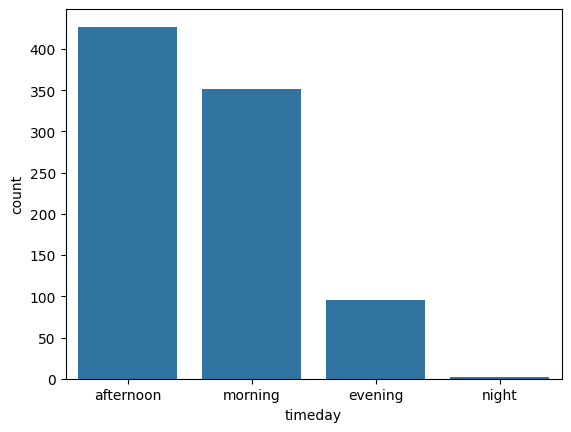

In [ ]:
import seaborn as sns

sns.countplot(x='timeday', data=df)

<Axes: xlabel='Primary_Injury', ylabel='count'>

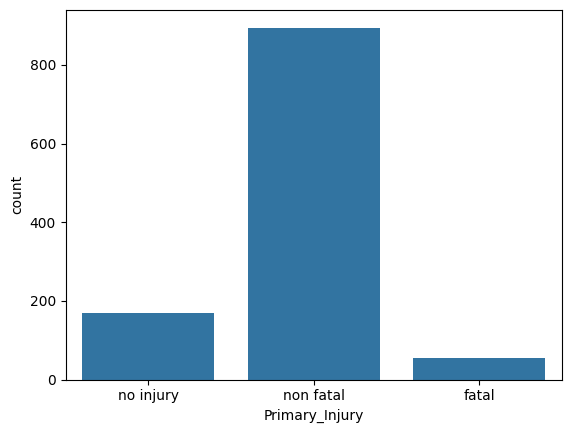

In [ ]:
sns.countplot(x='Primary_Injury', data=df)

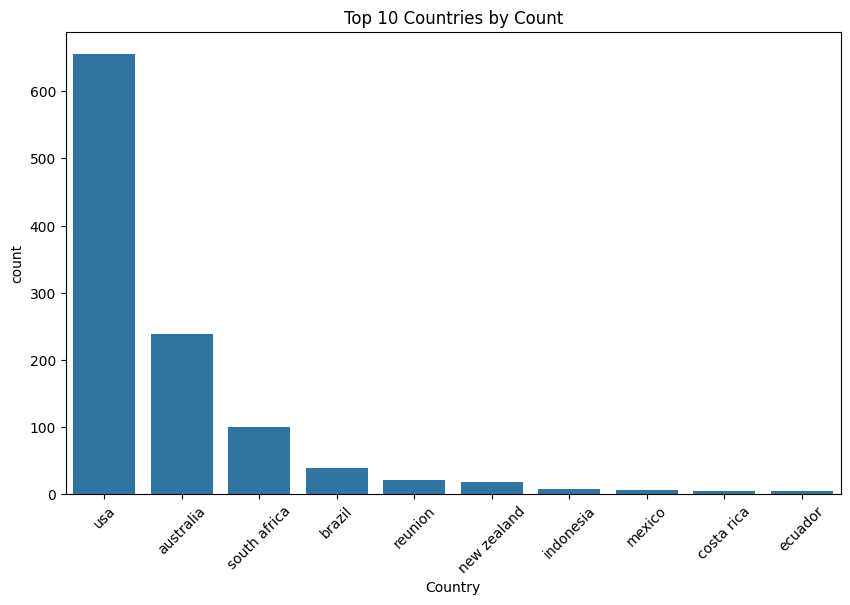

In [ ]:
import matplotlib.pyplot as plt
country_counts = df['Country'].value_counts()
top_10_countries = country_counts.head(10).index
df_top_10 = df[df['Country'].isin(top_10_countries)]
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df_top_10, order=top_10_countries)
plt.xticks(rotation=45)  # Rotate the labels if necessary
plt.title('Top 10 Countries by Count')
plt.show()


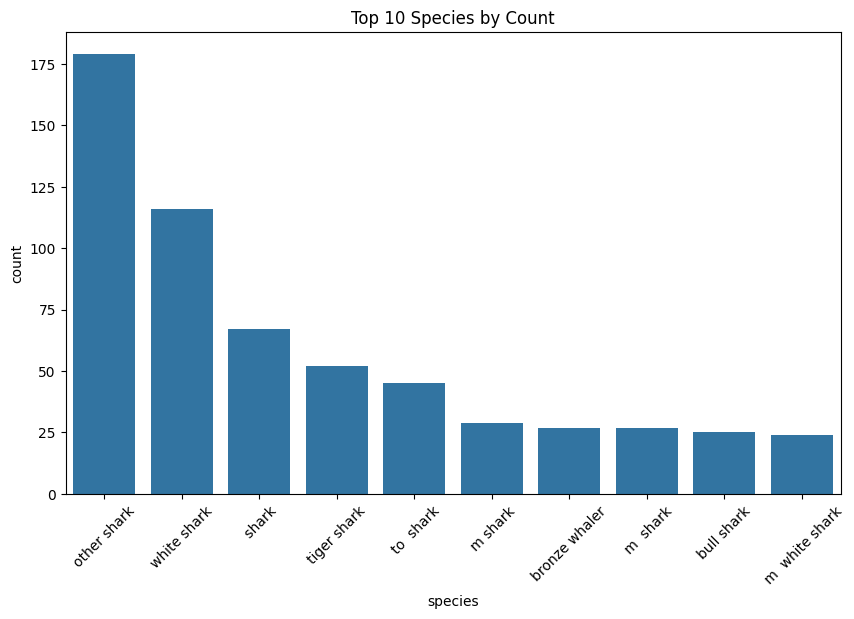

In [ ]:
species_counts = df['species'].value_counts()
top_10_species = species_counts.head(10).index
df_top_10_species = df[df['species'].isin(top_10_species)]
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=df_top_10_species, order=top_10_species)
plt.xticks(rotation=45)  # Rotate the labels if necessary
plt.title('Top 10 Species by Count')
plt.show()

In [ ]:
df = df.drop(columns=['Date'])

In [ ]:
# to be used at the end (replaces all the NaN with empty spaces. Looks way cleaner)
df = df.fillna('')
df.nunique()

Year                 76
Type                  7
Country              30
State                85
Activity              1
Time                154
species              23
Primary_Injury        3
Secondary_Detail    154
timeday               5
dtype: int64

In [ ]:
df['Year'] = df['Year'].astype(int)
df

,Year,Type,Country,State,Activity,Time,species,Primary_Injury,Secondary_Detail,timeday
0,2024,unprovoked,usa,hawaii,surfing,,tiger shark,no injury,shark bit surfboard,
1,2024,unprovoked,australia,south australia,surfing,13h00,white shark,non fatal,,midday
2,2023,unprovoked,usa,hawaii,surfing,11h12,,fatal,,morning
3,2023,unprovoked,australia,south australia,surfing,13h30,white shark,fatal,,midday
4,2023,unprovoked,australia,new south wales,surfing,16h30,,non fatal,,afternoon
...,...,...,...,...,...,...,...,...,...,...
1115,1922,unprovoked,australia,new south wales,surfing,20h00,,fatal,"disappeared, then his shark-bitten remains wa...",night
1116,1918,unprovoked,australia,new south wales,surfing,18h00,shark,non fatal,necessitating surgical amputation at the elbow,afternoon
1117,1828,unprovoked,usa,hawaii,surfing,,,fatal,,
1118,1779,unprovoked,usa,hawaii,surfing,,,fatal,buttock lacerated,


In [ ]:
# # Block for cleaning column 'Date' - Garima
# df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y', errors='coerce')

# # Format the 'Date' column to 'DD-MM-YYYY'
# df['FormattedDate'] = df['Date'].dt.strftime('%d-%m-%Y')

# # Display the 'FormattedDate' column
# # print(df['FormattedDate'].isna().sum())

# non_null_rows = df[df['FormattedDate'].notna()]

# # Display the filtered DataFrame
# # print(df_dup_removed['Year'].isna().sum())
# # print(non_null_rows)

# df['Year'] = df['Year'].astype('int')

# #df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

# # Step 3: Format the 'Time' column to '12-hour clock with AM/PM'
# df['FormattedTime'] = df['Time'].apply(lambda x: x.strftime('%I:%M %p') if pd.notna(x) else 'Invalid Time')

# # Display the DataFrame
# df

In [ ]:
#df['Type'].unique()

array(['unprovoked', 'other', 'provoked'], dtype=object)

In [ ]:
#main_categories = ['unprovoked', 'provoked']

In [ ]:
#df['Type'] = df['Type'].apply(lambda x: x if x in main_categories else 'other')

In [ ]:
display (df)

,Year,Type,Country,State,Activity,Time,species,Primary_Injury,Secondary_Detail,timeday
0,2024,,usa,hawaii,surfing,,tiger shark,no injury,shark bit surfboard,
1,2024,,australia,south australia,surfing,13h00,white shark,non fatal,,midday
2,2023,,usa,hawaii,surfing,11h12,,fatal,,morning
3,2023,,australia,south australia,surfing,13h30,white shark,fatal,,midday
4,2023,,australia,new south wales,surfing,16h30,,non fatal,,afternoon
...,...,...,...,...,...,...,...,...,...,...
1115,1922,,australia,new south wales,surfing,20h00,,fatal,"disappeared, then his shark-bitten remains wa...",night
1116,1918,,australia,new south wales,surfing,18h00,shark,non fatal,necessitating surgical amputation at the elbow,afternoon
1117,1828,,usa,hawaii,surfing,,,fatal,,
1118,1779,,usa,hawaii,surfing,,,fatal,buttock lacerated,
